# Analyse des contenus Netflix
---
**Auteurs:** Ludovic Potvin & Louis Séranne

**Cours:** 8PRO408


# Mise en place
---
Importation de tout les prerequis pour l'analyse.

In [9]:
# LIEN DU DATASET : https://www.kaggle.com/datasets/shivamb/netflix-shows

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from plotly.subplots import make_subplots

df = pd.read_csv("netflix_titles.csv")

# 1. Exploration du dataset
---
## Information generale

In [10]:
# Affichage d'information general
print("Info\n-------")
print(df.info())
print("\nDescribe\n-------")
print(df.describe())
print("\nNombres de null\n-----")
print(df.isnull().sum())
print("\nNombres de duplicats: ", df.duplicated().sum())

Info
-------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None

Describe
-------
       release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000

Nombres de null
-----
show_id      

## Observations
Les premiers affichages du code demontre qu'il y a de la donnees en erreurs.

Les colonnes suivantes on une ou plusieurs valeurs vide:
- director
- cast
- country
- date_added
- rating
- duration

### Nombre de director null par type

In [11]:
# Construction du data
null_count = df[df['director'].isnull()].groupby('type')['type'].count().to_frame('nulls')
total = df.groupby('type')['type'].count().to_frame('total')
result = pd.merge(total, null_count, left_index=True, right_index=True)
result['notnull'] = result['total'] - result['nulls']
result['null%'] = (result['nulls'] / result['total'] * 100)

# Affichage
print(result)

         total  nulls  notnull      null%
type                                     
Movie     6131    188     5943   3.066384
TV Show   2676   2446      230  91.405082


On peut remarquer que le nombre de `null` pour la colonne director est concentre dans le type TV Show.

# 2. Analyse de contenus
---
L'analyse de contenue vise a comparer les donnees entre elle. Voir les tendances.

## Film vs series
Tout d'abord, voyons les proportions de film et de series.

In [12]:
# Preparation de la donnees
data = df.groupby('type')['type'].count().reset_index(name='count')

fig = px.pie(
    data,
    names='type',
    values='count',
    title='Distribution de type dans le catalogue Netflix',
)
fig.show()

Avec ce graphique, il est facile de remarquer que le catalogue Netflix contient une proportion nettement plus importante de films que de série.

Cela s’explique par :
- Une production historique plus élevée de films dans l’industrie,
- La facilité de distribution de films anciens via les plateformes,
- Le coût généralement plus élevé de création de séries originales.

Même si Netflix investit massivement dans les séries depuis quelques années, la majorité du catalogue reste composée de films.

## Evolution du catalogue dans le temps

In [13]:
# Nombre de titres par type et année de sortie
data = (df
        .groupby(['release_year', 'type'])['show_id']
        .count()
        .reset_index(name='count'))

print(data)


     release_year     type  count
0            1925  TV Show      1
1            1942    Movie      2
2            1943    Movie      3
3            1944    Movie      3
4            1945    Movie      3
..            ...      ...    ...
114          2019  TV Show    397
115          2020    Movie    517
116          2020  TV Show    436
117          2021    Movie    277
118          2021  TV Show    315

[119 rows x 3 columns]


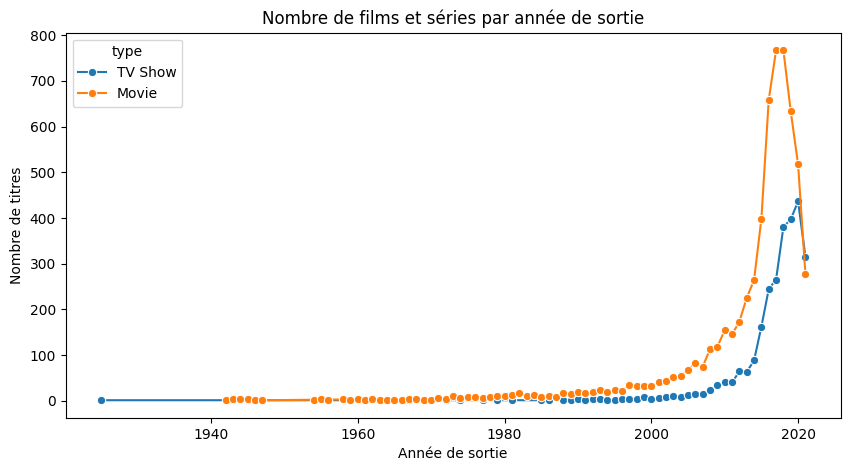

In [14]:
# Nombre de titres par type et année de sortie
plt.figure(figsize=(10, 5))
sns.lineplot(data=data, x='release_year', y='count', hue='type', marker='o')
plt.title("Nombre de films et séries par année de sortie")
plt.xlabel("Année de sortie")
plt.ylabel("Nombre de titres")
plt.show()


On observe une croissance nette du nombre de titres à partir des années 2000, atteignant un pic vers 2017–2020.
Cela montre :
- Une modernisation progressive du catalogue,
- Un focus sur des productions plus récentes,
- Un faible volume de contenus très anciens (avant 1980), probablement dû aux droits de distribution complexes.

## Genres principaux

Nous analysons la colonne `listed_in` qui contient un ou plusieurs genres par titre.


In [15]:

# Exploser la colonne listed_in en une ligne par genre
genres_series = df['listed_in'].str.split(', ').explode()

genres_counts = genres_series.value_counts().reset_index()
genres_counts.columns = ['genre', 'count']
genres_counts.head()


,genre,count
0,International Movies,2752
1,Dramas,2427
2,Comedies,1674
3,International TV Shows,1351
4,Documentaries,869


In [16]:
#Représentation par barre
fig = px.bar(
    genres_counts.head(20),
    x='genre', y='count',
    title='Genres les plus populaires',
    labels={'genre': 'Genre', 'count': 'Nombre de titres'}
)
fig.update_layout(xaxis_tickangle=-45)
fig.show()

Les genres dominants sont généralement :
International Movies
- Dramas
- Comedies
- Documentaries

Cela reflète :
- La stratégie internationale de Netflix, qui s’adresse à un public global
- Une forte production de drames, genre très répandu dans de nombreux pays
- Une présence significative de documentaires, domaine dans lequel Netflix investit fortement

La variété des genres témoigne d’un catalogue très diversifié pour attirer des audiences variées

## Répartition géographique des contenus


In [17]:
countries_series = df['country'].replace('nan', np.nan).dropna().str.split(', ').explode()
country_counts = countries_series.value_counts().reset_index()
country_counts.columns = ['country', 'count']
country_counts.head()


,country,count
0,United States,3689
1,India,1046
2,United Kingdom,804
3,Canada,445
4,France,393


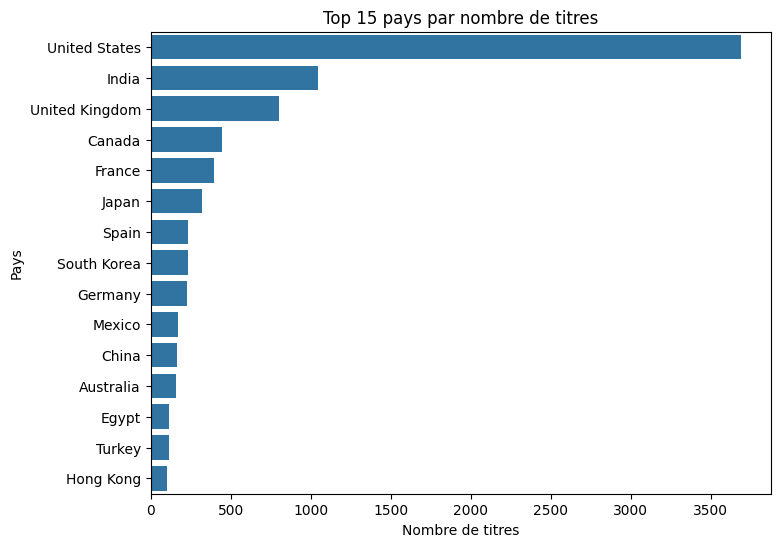

In [18]:
#Représentation par barre
plt.figure(figsize=(8, 6))
sns.barplot(data=country_counts.head(15), y='country', x='count')
plt.title("Top 15 pays par nombre de titres")
plt.xlabel("Nombre de titres")
plt.ylabel("Pays")
plt.show()


Les pays les plus représentés sont typiquement :
- États-Unis
- Inde, avec une forte production Bollywood
- Royaume-Uni
- Canada
- divers pays non anglophones (France, Japon, Corée du Sud…)

Ce résultat confirme :
- La domination de l’industrie américaine dans le cinéma et les séries
- La stratégie de Netflix visant à toucher des marchés internationaux
- L’importance croissante des productions indiennes et asiatiques

## Casting et réalisateurs


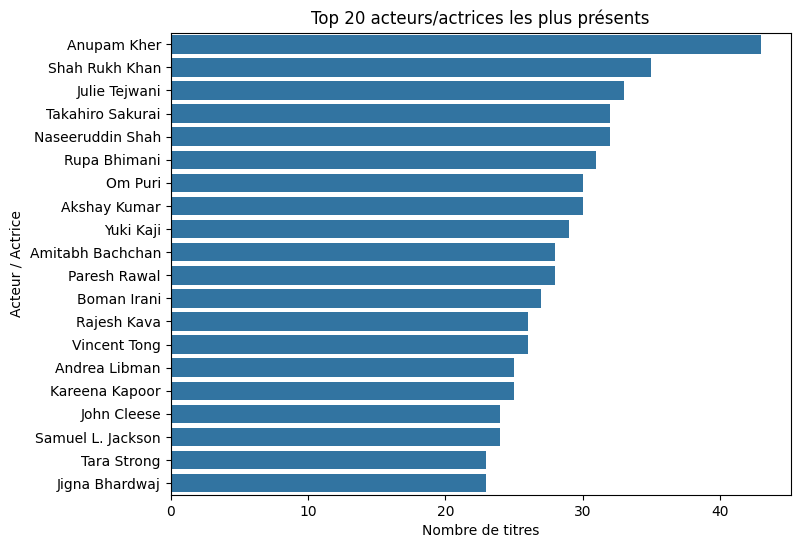

In [19]:
cast_series = df['cast'].replace('nan', np.nan).dropna().str.split(', ').explode()
cast_counts = cast_series.value_counts().reset_index()
cast_counts.columns = ['actor', 'count']

plt.figure(figsize=(8, 6))
sns.barplot(data=cast_counts.head(20), y='actor', x='count')
plt.title("Top 20 acteurs/actrices les plus présents")
plt.xlabel("Nombre de titres")
plt.ylabel("Acteur / Actrice")
plt.show()


On note la présence majoritaire d’acteurs issus :
- Des productions américaines
- Des films indiens (Bollywood)

La concentration sur certains acteurs traduit soit une forte productivité, soit la présence de nombreuses productions issues d’un même pays ou studio.

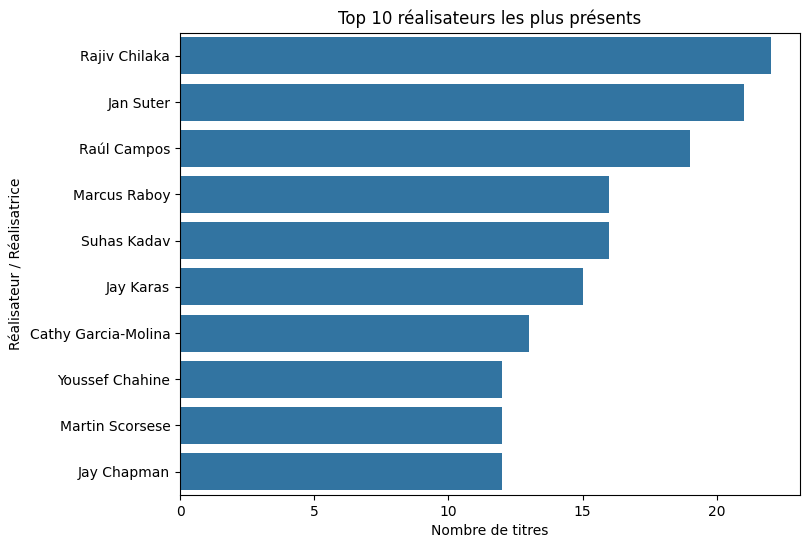

In [20]:
director_series = df['director'].replace('nan', np.nan).dropna().str.split(', ').explode()
director_counts = director_series.value_counts().reset_index()
director_counts.columns = ['director', 'count']

plt.figure(figsize=(8, 6))
sns.barplot(data=director_counts.head(10), y='director', x='count')
plt.title("Top 10 réalisateurs les plus présents")
plt.xlabel("Nombre de titres")
plt.ylabel("Réalisateur / Réalisatrice")
plt.show()


Le nombre réduit de réalisateurs fréquemment représentés s’explique par :
- Le grand nombre de valeurs manquantes dans la colonne director
- La diversité des productions, qui distribue les réalisateurs sur un vaste ensemble
- L’absence de centralisation typique des plateformes de cinéma classiques

Cela rend difficile une analyse poussée des réalisateurs, mais confirme la pluralité des sources de contenus.

# 3. Analyse temporelle


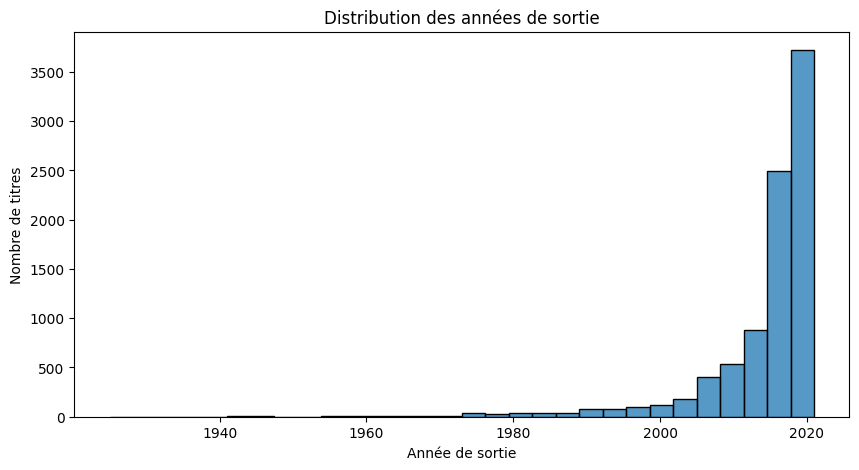

In [21]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='release_year', bins=30)
plt.title("Distribution des années de sortie")
plt.xlabel("Année de sortie")
plt.ylabel("Nombre de titres")
plt.show()


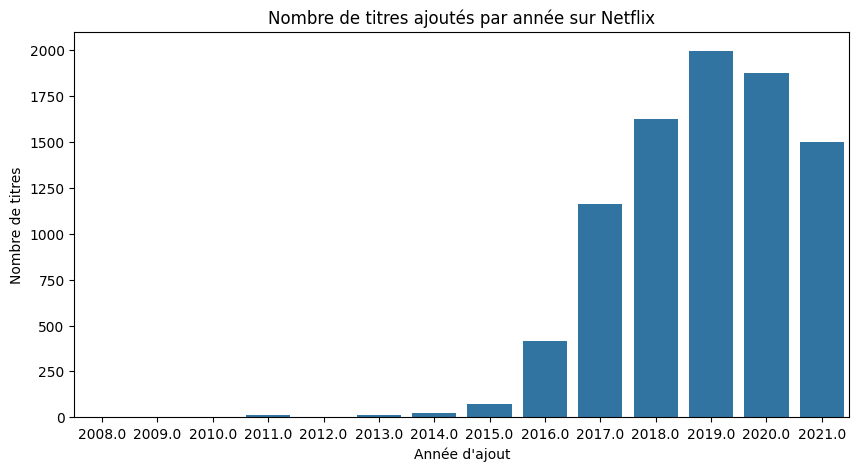

In [22]:
# Représentation par barre

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
added_per_year = df['year_added'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.barplot(x=added_per_year.index, y=added_per_year.values)
plt.title("Nombre de titres ajoutés par année sur Netflix")
plt.xlabel("Année d'ajout")
plt.ylabel("Nombre de titres")
plt.show()

On observe une forte augmentation du nombre de contenus ajoutés à partir de 2015, correspondant à :
- L’expansion mondiale de Netflix
- L’arrivée massive de contenus originaux Netflix (Netflix Originals)
- Une stratégie de diversification du catalogue

Une baisse éventuelle après 2020 peut refléter :
- Des restrictions de droits
- Les effets de la pandémie sur la production mondiale